In [4]:
import cv2
haar_file = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

In [2]:
def faces_extractor(img):
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    if faces is ():
        return None
    faces_list = []
    for (x, y, w, h) in faces:
        cropped_face = img[y:y+h, x:x+w]
        faces_list.append(cropped_face)
    return faces_list


<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\MSI\AppData\Local\Temp\ipykernel_14484\620218420.py:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [ ]:
# take in a image and put a rectangle around each face using faces_extractor

def face_detector(img, size=0.5):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img, []
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 255), 2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))
    return img, roi




In [6]:
import tensorflow as tf
# load model
model = tf.keras.models.load_model('model9.h5')

In [7]:
class_names = ['khalil','others']

1/1 [==============================] - 0s 33ms/step
[[-0.15407608  0.9918582 ]]
others
1/1 [==============================] - 0s 30ms/step
[[ 3.016475 -4.174299]]
khalil


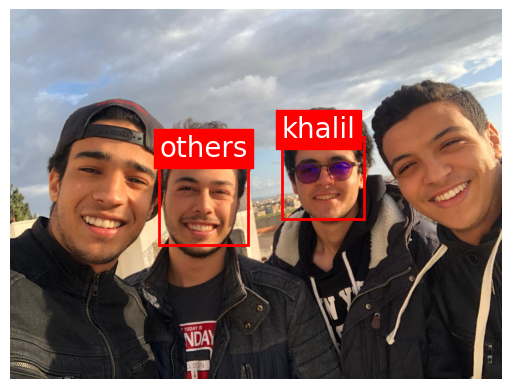

In [11]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
image = cv2.imread('many.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
faces = face_cascade.detectMultiScale(image, 1.3, 5)
for (x, y, w, h) in faces:
    # cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 255), 2)
    # use plt to draw the rectangle
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2))
    #predict and show the name
    roi = image[y:y+h, x:x+w]
    roi = cv2.resize(roi, (256, 256))
    roi = np.expand_dims(roi, axis=0)
    prediction = model.predict(roi)
    print(prediction)
    print(class_names[np.argmax(prediction)])
    plt.text(x, y, class_names[np.argmax(prediction)], color='white', fontsize=20, backgroundcolor='red')

plt.axis('off')
plt.show()
# cv2.imshow('img', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [5]:
# load the model
import tensorflow as tf
model = tf.keras.models.load_model('model9.h5')

In [7]:
class_names=["khalil","others"]

In [9]:
import numpy as np
im_path = 'khalil9.jpg'

img = tf.keras.utils.load_img(
    im_path, target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 29ms/step
This image most likely belongs to khalil with a 100.00 percent confidence.


In [ ]:
image = cv2.imread('many.jpeg')
face, face_img = face_detector(image)
try:
    face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
    result = model.predict(face_img)
    if result[1] < 500:
        confidence = int(100 * (1 - (result[1])/400))
        display_string = str(confidence) + '% Confident it is User'
    cv2.putText(face, display_string, (100, 120), cv2.FONT_HERSHEY_COMPLEX, 1, (250, 120, 255), 2)
    if confidence > 75:
        cv2.putText(face, "Hey, I know you", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow('Face Recognition', face)
    else:
        cv2.putText(face, "I don't know, who are you?", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
        cv2.imshow('Face Recognition', face)
except:
    cv2.putText(face, "No Face Found", (220, 120), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
    cv2.putText(face, "Looking for Face...", (210, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 0), 2)
    cv2.imshow('Face Recognition', face)
    pass
if cv2.waitKey(1) == 13:
    cv2.destroyAllWindows()
    cap.release()
    break
